In [1]:
import numpy as np
import pandas as pd

In [20]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv('mail_data.csv')

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data = df.where((pd.notnull(df)), '')

In [6]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
print(df['Category'].value_counts())

Category
ham     4825
spam     747
Name: count, dtype: int64


In [8]:
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

In [9]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


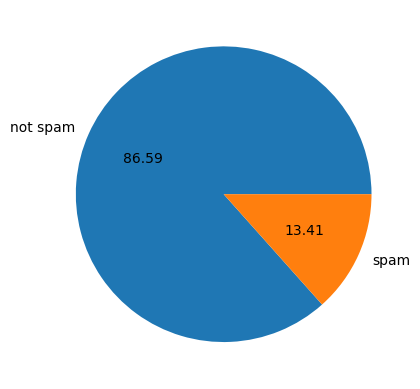

In [10]:
import matplotlib.pyplot as plt
plt.pie( df['Category'].value_counts(), labels=['not spam','spam'], autopct='%.2f')
plt.show()

In [11]:
X = df['Message']
y = df['Category']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=3 )

In [13]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [14]:
model = LogisticRegression()

model.fit(X_train_features, y_train)

LogisticRegression()

In [23]:
#Test Data
pred_train = model.predict(X_train_features)
accuracy = accuracy_score(y_train, pred_train)
precision = precision_score(y_train, pred_train)
print(accuracy)
print(precision)

0.9676912721561588
0.9912280701754386


In [22]:
# Training Data
pred_train = model.predict(X_test_features)
accuracy = accuracy_score(y_test, pred_train)
precision = precision_score(y_test, pred_train)
print(accuracy)
print(precision)

0.9668161434977578
1.0


In [17]:
input = ["""
Here is another common type of spam email, this one using a "prize win" lure:

Subject: Congratulations! You've Won!

Body:

Dear Valued Customer,

You have been selected as the lucky winner of our monthly draw! Your prize: a $1000 Gift Card.

To claim your reward, you just need to confirm your shipping details and pay a small $1.99 processing fee.
"""]

In [24]:
# input = ["Congratulations! You have been selected to receive a special reward."]
input_data_feature = feature_extraction.transform(input)
pred_result = model.predict(input_data_feature)

print(pred_result)
if pred_result[0] ==0:
    print('Not Spam')
else:
    print('Spam')


[1]
Spam


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 32 stored elements and shape (1, 7431)>

In [19]:
import pickle
pickle.dump(feature_extraction,open('Vectorizer_spam_mail.pkl','wb'))
pickle.dump(model,open('logistic_reg_model.pkl','wb'))